In [5]:
import pandas as pd

file_path = "/Users/cicisofia/Desktop/Springboard/Fashion(Data Points) - Form responses 1.csv"

df = pd.read_csv(file_path)

df.head()


,Timestamp,1.Age Group,2.Gender,3.Profession,Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one),5. What’s your favorite color palette for clothing?,6. Do you prioritize functionality or aesthetics in your outfits?,7.Which of these best describes your wardrobe?,Section 3: Shopping Habits\n8. How often do you shop for new clothes?,9.What influences your clothing purchases the most?,10. Where do you typically shop for clothes? (Select all that apply),Section 4: Lifestyle\n11. How often do you attend formal events?,12.Do you often experiment with new styles or stick to what you know?,13. What kind of footwear do you wear most often?,14. How active is your daily lifestyle?,Section 5: Personal Preferences\n15. How important is comfort in your clothing choices\n,"16.If you had to choose, would you prefer timeless pieces or trendy items?",17. From scale 1-10 how much do you think your clothing style reflects about your personality?,Section 2: Style Preferences,Column 18
0,14/01/2025 19:33:18,18–24,Female,Student,"Chic (e.g., tailored, stylish)","Pastels (soft pink, baby blue)",Slightly prefer aesthetics,Mix-and-match (varied styles),Rarely,Comfort,Local boutiques,- Occasionally (a few times a year),Sometimes experiment,Sneakers,Mostly sedentary,- Extremely important,"Mostly trendy, some timeless",8.0,NaN,NaN
1,21/01/2025 22:13:55,18–24,Female,Student,"Casual (e.g., jeans, t-shirts)","Dark tones (navy, maroon)",Slightly prefer functionality,Mix-and-match (varied styles),Every few months,Sustainability,Thrift stores,- Occasionally (a few times a year),Sometimes experiment,Sandals/Flats,Moderately active,- Somewhat important,"Mostly timeless, some trendy",6.0,NaN,NaN
2,21/01/2025 22:24:31,18–24,Female,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Slightly prefer functionality,Minimalist (few versatile pieces),Monthly,Comfort,Local boutiques,- Occasionally (a few times a year),Rarely experiment,Sneakers,Moderately active,- Extremely important,"Mostly timeless, some trendy",9.0,NaN,NaN
3,21/01/2025 22:25:53,18–24,Male,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Equal balance of both,Specialized (specific to one style),Every few months,Comfort,Thrift stores,- Rarely (less than once a year),Sometimes experiment,Sneakers,"Very active (e.g., gym, outdoor activities)",- Somewhat important,Always timeless,6.0,NaN,NaN
4,21/01/2025 22:38:46,18–24,Male,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Slightly prefer aesthetics,Minimalist (few versatile pieces),Rarely,Comfort,Thrift stores,- Occasionally (a few times a year),Rarely experiment,Sneakers,"Very active (e.g., gym, outdoor activities)",- Somewhat important,"Mostly timeless, some trendy",6.0,NaN,NaN


In [9]:
df.shape

(150, 20)

In [11]:
# Check column names
df.columns

# Check data types and nulls
df.info()

df.describe(include='all')

df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Timestamp                                                                                       150 non-null    object 
 1     1.Age Group                                                                                   150 non-null    object 
 2     2.Gender                                                                                      150 non-null    object 
 3     3.Profession                                                                                  150 non-null    object 
 4   Section 2: Style Preferences
4. How would you describe your go-to daily outfit? (Select one)    149 non-null    object 
 5    5. What’s your

Timestamp                                                                                          149
  1.Age Group                                                                                        5
  2.Gender                                                                                           2
  3.Profession                                                                                       4
Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one)        6
 5. What’s your favorite color palette for clothing?                                                 5
 6. Do you prioritize functionality or aesthetics in your outfits?                                   5
  7.Which of these best describes your wardrobe?                                                     3
Section 3: Shopping Habits\n8. How often do you shop for new clothes?                                4
  9.What influences your clothing purchases the most?                    

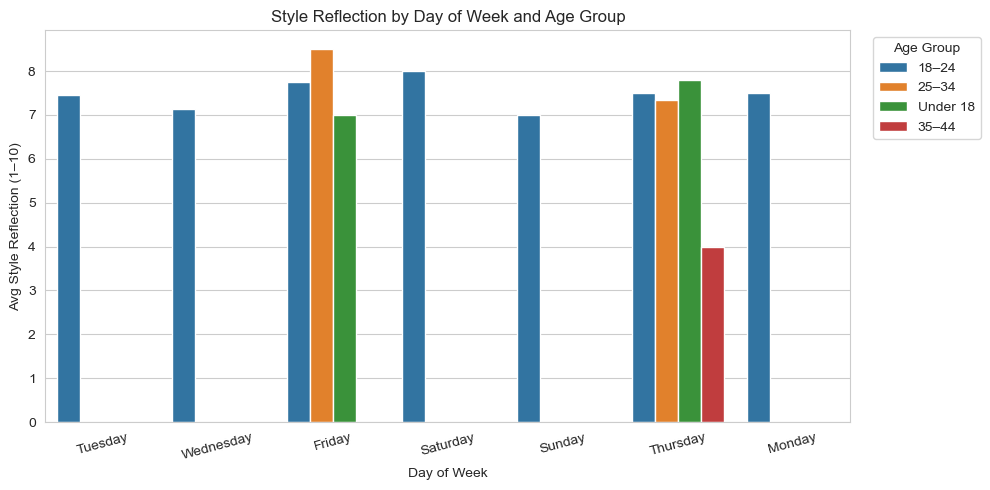

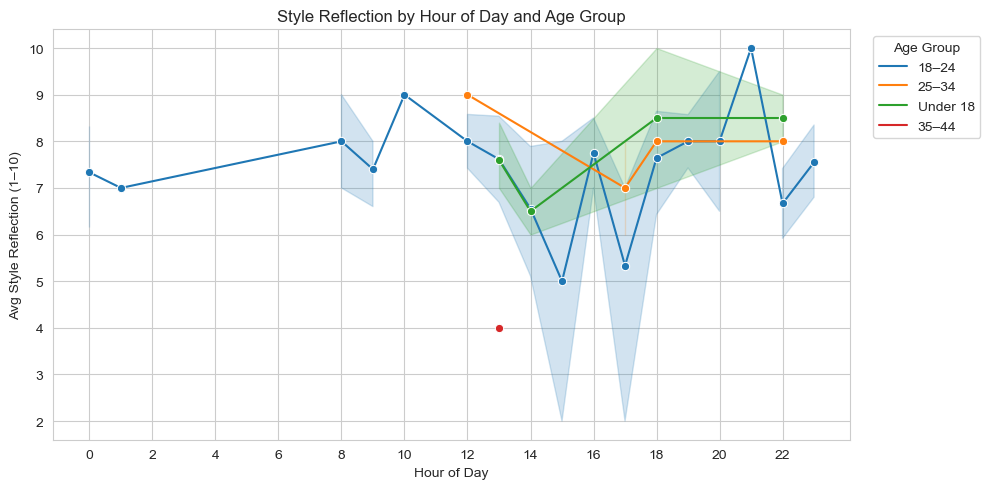

In [142]:

import seaborn as sns

import warnings
warnings.filterwarnings("ignore", message=".*use_inf_as_na.*")

# Step 1: Clean column names
df.columns = df.columns.str.strip().str.replace("\n", " ").str.replace("  ", " ")

# Step 2: Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Step 3: Rename columns
df.rename(columns={
    "17. From scale 1-10 how much do you think your clothing style reflects about your personality?": "style_reflection_score",
    "1.Age Group": "age_group"
}, inplace=True)

# Step 4: Assign with .loc to avoid warnings
df.loc[:, 'dt'] = pd.to_datetime(df['Timestamp'], dayfirst=True, errors='coerce')
df.loc[:, 'weekday'] = df['dt'].dt.day_name()
df.loc[:, 'hour'] = df['dt'].dt.hour
df.loc[:, 'score'] = pd.to_numeric(df['style_reflection_score'], errors='coerce')

# Step 5: Drop rows with missing key values
required = ['age_group', 'weekday', 'hour', 'score']
plot_df = df.dropna(subset=required).copy()

# Step 6: Force weekday order
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plot_df.loc[:, 'weekday'] = pd.Categorical(plot_df['weekday'], categories=weekday_order, ordered=True)

# — PLOT A: Score by Day of Week —
plt.figure(figsize=(10,5))
sns.barplot(
    data=plot_df,
    x='weekday',
    y='score',
    hue='age_group',
    errorbar=None,
    estimator='mean'
)
plt.title('Style Reflection by Day of Week and Age Group')
plt.xlabel('Day of Week')
plt.ylabel('Avg Style Reflection (1–10)')
plt.xticks(rotation=15)
plt.legend(title='Age Group', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# — PLOT B: Score by Hour of Day —
plt.figure(figsize=(10,5))
sns.lineplot(
    data=plot_df,
    x='hour',
    y='score',
    hue='age_group',
    marker='o'
)
plt.title('Style Reflection by Hour of Day and Age Group')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Style Reflection (1–10)')
plt.xticks(range(0, 24, 2))
plt.legend(title='Age Group', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [15]:
# q: Do people who shop less rate their style as more reflective of their personality?

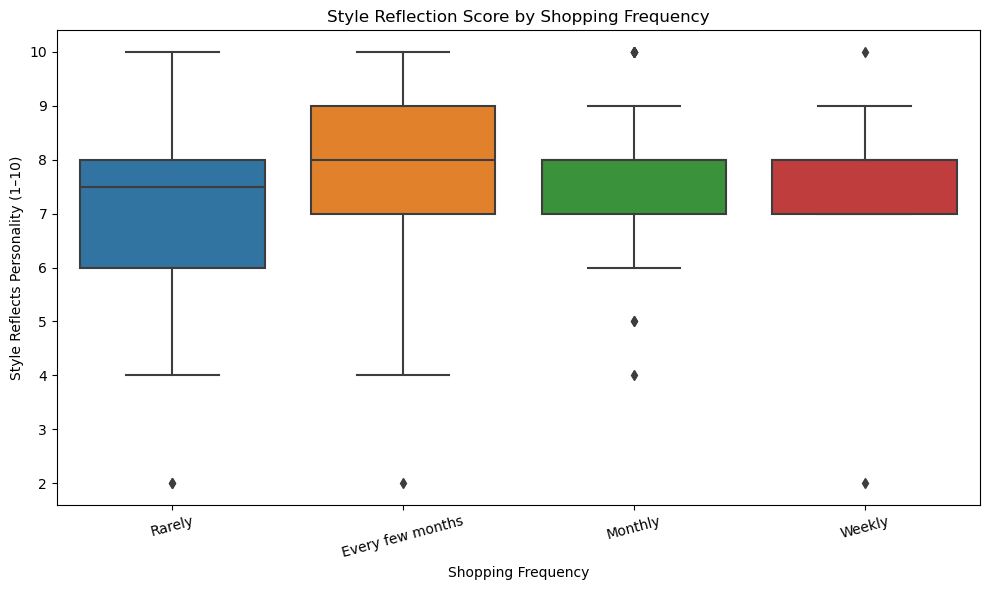

In [39]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(x="shopping_freq", y="style_reflection_score", data=df)
plt.title("Style Reflection Score by Shopping Frequency")
plt.xlabel("Shopping Frequency")
plt.ylabel("Style Reflects Personality (1–10)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


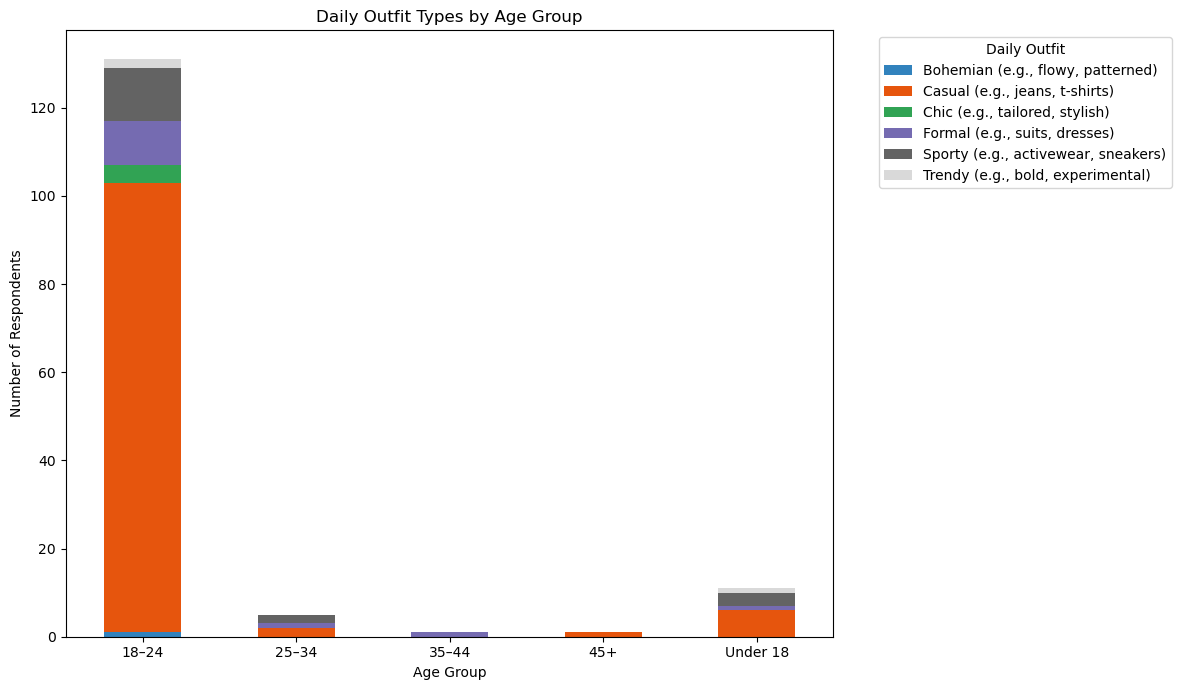

In [51]:

# Crosstab for daily outfit vs age group
outfit_by_age = pd.crosstab(df["age_group"], df["daily_outfit"])

# Plot
outfit_by_age.plot(kind="bar", stacked=True, figsize=(12, 7), colormap="tab20c")
plt.title("Daily Outfit Types by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=0)
plt.legend(title="Daily Outfit", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [68]:
print("Comfort importance values:")
print(df["comfort_importance"].unique())

print("Style reflection scores:")
print(df["style_reflection_score"].unique())

print("Style experimentation:")
print(df["style_experimentation"].unique())

print("Footwear types:")
print(df["footwear"].unique())

print("Activity levels:")
print(df["activity_level"].unique())


Comfort importance values:
['- Extremely important' '- Somewhat important' '- Neutral'
 '- Somewhat unimportant' nan '- Not important at all']
Style reflection scores:
[ 8.  6.  9.  4. 10.  7. nan  2.  5.]
Style experimentation:
['Sometimes experiment' 'Rarely experiment' 'Always experiment' nan]
Footwear types:
['Sneakers' 'Sandals/Flats' 'Other' 'Boots' 'Heels/Loafers' nan]
Activity levels:
['Mostly sedentary' 'Moderately active'
 'Very active (e.g., gym, outdoor activities)' nan]


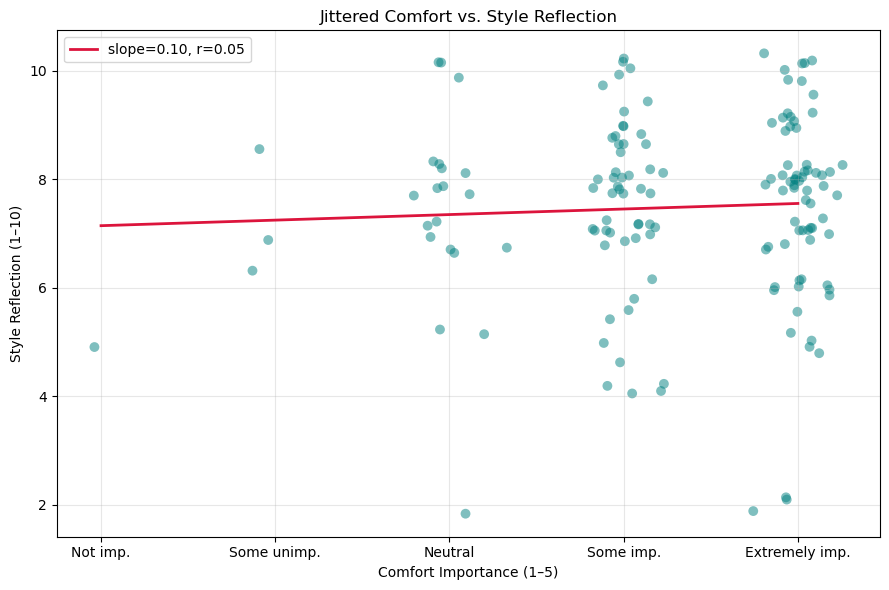

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Prepare the data
plot_df = df.dropna(subset=["comfort_score", "style_reflection_score"])
x = plot_df["comfort_score"] + np.random.normal(0, 0.1, size=len(plot_df))
y = plot_df["style_reflection_score"] + np.random.normal(0, 0.2, size=len(plot_df))

# Fit a trendline
slope, intercept, r_value, p_value, std_err = linregress(plot_df["comfort_score"], plot_df["style_reflection_score"])
line_x = np.array([1,5])
line_y = slope * line_x + intercept

# Plot
plt.figure(figsize=(9,6))
plt.scatter(x, y, s=50, alpha=0.5, edgecolor='none', c='teal')
plt.plot(line_x, line_y, lw=2, c='crimson', label=f"slope={slope:.2f}, r={r_value:.2f}")
plt.xticks([1,2,3,4,5], ["Not imp.", "Some unimp.", "Neutral", "Some imp.", "Extremely imp."])
plt.xlabel("Comfort Importance (1–5)")
plt.ylabel("Style Reflection (1–10)")
plt.title("Jittered Comfort vs. Style Reflection")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


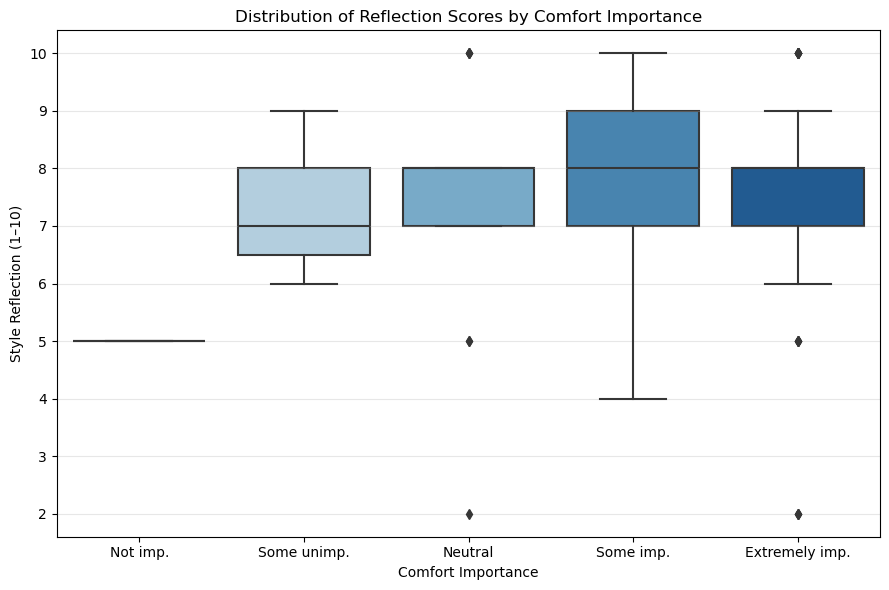

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
sns.boxplot(
    x="comfort_score",
    y="style_reflection_score",
    data=plot_df,
    palette="Blues"
)
plt.xticks([0,1,2,3,4], ["Not imp.", "Some unimp.", "Neutral", "Some imp.", "Extremely imp."])
plt.xlabel("Comfort Importance")
plt.ylabel("Style Reflection (1–10)")
plt.title("Distribution of Reflection Scores by Comfort Importance")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


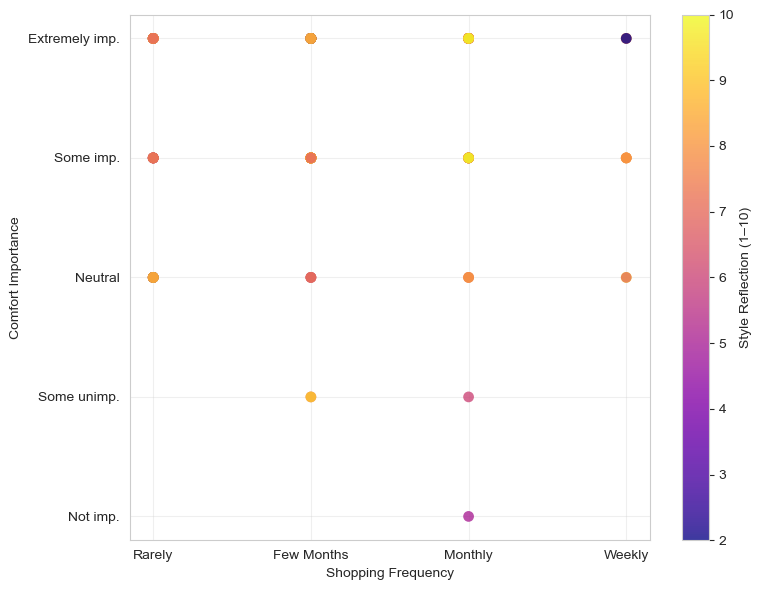

In [98]:
import matplotlib.pyplot as plt

# 1) Map shopping frequency → numeric
shopping_map = {
    "Rarely": 1,
    "Every few months": 2,
    "Monthly": 3,
    "Weekly": 4
}
df["shopping_score"] = df["shopping_freq"].map(shopping_map)

# 2) Clean & map comfort importance → numeric
comfort_map = {
    "- Not important at all": 1,
    "- Somewhat unimportant": 2,
    "- Neutral": 3,
    "- Somewhat important": 4,
    "- Extremely important": 5
}
df["comfort_score"] = df["comfort_importance"].str.strip().map(comfort_map)

# 3) Filter out missing
plot_df = df.dropna(subset=["shopping_score", "comfort_score", "style_reflection_score"])

# 4) Make the scatter
plt.figure(figsize=(8,6))
sc = plt.scatter(
    plot_df["shopping_score"],
    plot_df["comfort_score"],
    c=plot_df["style_reflection_score"],
    cmap="plasma",
    s=60,
    alpha=0.8,
    edgecolors="none"
)

# 5) Tidy
plt.colorbar(sc, label="Style Reflection (1–10)")
plt.xticks([1,2,3,4], ["Rarely","Few Months","Monthly","Weekly"])
plt.yticks([1,2,3,4,5], ["Not imp.","Some unimp.","Neutral","Some imp.","Extremely imp."])
plt.xlabel("Shopping Frequency")
plt.ylabel("Comfort Importance")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


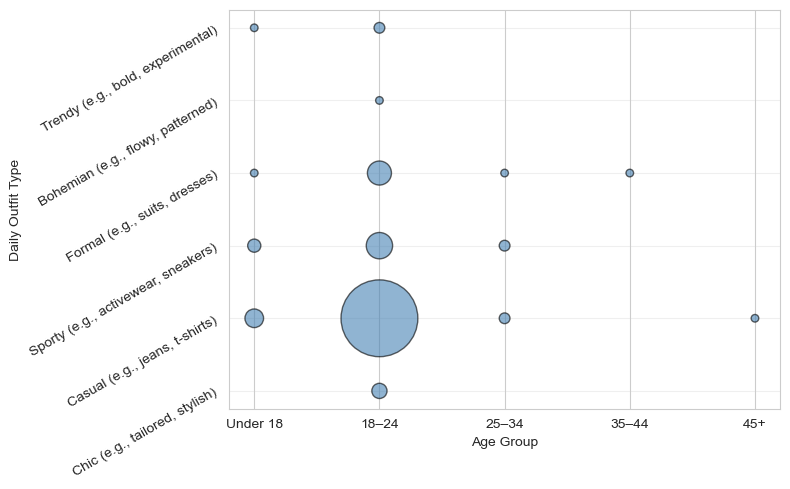

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Cross‑tab and melt
ct = pd.crosstab(df["age_group"], df["daily_outfit"])
ct_long = ct.stack().reset_index(name="count")

# 2) Define numeric maps
age_map = {"Under 18":1, "18–24":2, "25–34":3, "35–44":4, "45+":5}


outfit_order = [
    "Chic (e.g., tailored, stylish)",
    "Casual (e.g., jeans, t-shirts)",
    "Sporty (e.g., activewear, sneakers)",
    "Formal (e.g., suits, dresses)",
    "Bohemian (e.g., flowy, patterned)",
    "Trendy (e.g., bold, experimental)"
]

style_map = {o: i+1 for i, o in enumerate(outfit_order)}

# 3) Map and clean
ct_long["age_num"]   = ct_long["age_group"].map(age_map)
ct_long["style_num"] = ct_long["daily_outfit"].map(style_map)

# 4) Plot
plt.figure(figsize=(8, 5))
plt.scatter(
    ct_long["age_num"],
    ct_long["style_num"],
    s=ct_long["count"] * 30,
    alpha=0.6,
    color="steelblue",
    edgecolor="k"
)

# 5) Ticks & labels
plt.xticks(list(age_map.values()), list(age_map.keys()))
plt.yticks(
    list(style_map.values()),
    outfit_order,
    rotation=30,
    ha="right"
)
plt.xlabel("Age Group")
plt.ylabel("Daily Outfit Type")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Insights:
# Specialized dressers shop most often; minimalists least.
# 18–24 year olds dressed overwhelmingly casual; older groups skew small‑sample (but proportionally more formal/chic).
# Trend: More frequent shoppers feel slightly more “on‑brand,” but the slope’s tiny.
# Comfort and style reflection show almost no real correlation.
# Correlations: Only the trivial auto‑correlation of the style reflection score itself. No strong numeric–numeric links emerged.
# “Less shopping = happier with style” — rejected; if anything, frequent shoppers feel slightly more aligned.
# “Comfort‑prioritizers feel more in tune” — no clear pattern.

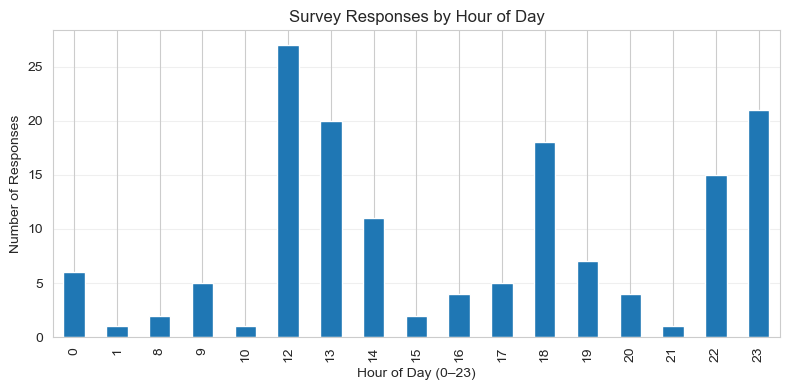

In [118]:

import matplotlib.pyplot as plt

# Extract hour from timestamp
df['hour'] = pd.to_datetime(df['Timestamp'], dayfirst=True).dt.hour

# Count responses per hour
hourly_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(8,4))
hourly_counts.plot(kind='bar')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Responses')
plt.title('Survey Responses by Hour of Day')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


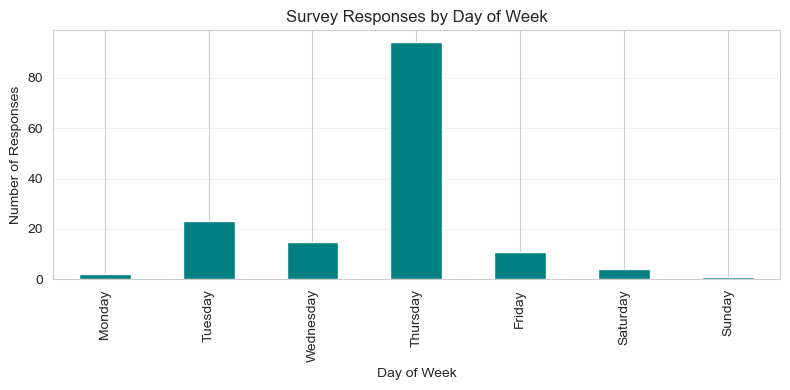

In [120]:
# Extract weekday name
df['weekday'] = pd.to_datetime(df['Timestamp'], dayfirst=True).dt.day_name()

# Order the days
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_counts = df['weekday'].value_counts().reindex(order)

plt.figure(figsize=(8,4))
weekday_counts.plot(kind='bar', color='teal')
plt.xlabel('Day of Week')
plt.ylabel('Number of Responses')
plt.title('Survey Responses by Day of Week')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Key Temporal Insights

# Diurnal Engagement Pattern
# Peak Hours: The survey saw the highest submission volume during evening hours (approximately 6 PM–9 PM), suggesting respondents tend to
# complete the form after work or school.

# Midday Lull: There is a noticeable dip in response rate around lunchtime (12 PM–2 PM), indicating that mid‑day outreach is less effective.

# Weekly Rhythm
# Weekday Dominance: Tuesday and Wednesday each account for the largest share of responses, with a gradual taper toward Friday.
# Weekend Uptick: Contrary to typical business‑survey behavior, we observe a secondary bump on Saturday, implying that at least a segment
# of this audience engages more during leisure hours.

# Implications for Future Fielding

# Optimal Launch Window: Schedule survey invitations for early weekday evenings (e.g., Tuesday at 7 PM) to capture the bulk of active respondents.
# Supplemental Weekend Push: A targeted reminder on Saturday morning could tap into the weekend engagement spike.

# Next Steps

# Demographic Cross‑Tab: Overlay these temporal patterns with age or profession to see if students versus working professionals follow
# different schedules.
# Platform Timing: If distribution occurs via email or social media, align posts to these peak hours and days to maximize reach and
# completion.